In [1]:
from sklearn import tree	#决策树模型 
from sklearn.model_selection import train_test_split	#训练集与测试集划分
import pandas as pd
import numpy as np
import graphviz # gra库
import pydot

In [2]:
# -*- coding: utf-8 -*-
data=pd.read_csv(r"D:\software_bag_X\MicrosoftVScodefiles\slowsick.xlsx",encoding='utf-8')
data.info()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 0-1: invalid continuation byte

In [ ]:
data.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
637,43,M,ASY,115,303,0,Normal,181,N,1.2,Flat,0
202,42,M,NAP,160,147,0,Normal,146,N,0.0,Up,0
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
165,46,M,TA,140,272,1,Normal,175,N,2.0,Flat,1
125,54,M,ATA,120,246,0,Normal,110,N,0.0,Up,0
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
504,62,M,ASY,158,210,1,Normal,112,Y,3.0,Down,1
226,53,M,NAP,120,195,0,Normal,140,N,0.0,Up,0
724,45,F,ATA,112,160,0,Normal,138,N,0.0,Flat,0
646,66,M,ASY,160,228,0,LVH,138,N,2.3,Up,0


In [ ]:
#对五个名义变量进行映射
data['ChestPainType'].value_counts() #统计变量值类型
ChestPainType_Map={'ASY':1,'NAP':2,'ATA':3,'TA':4} #建立 变量值类型：映射数值 的字典，就比如'ASY'这里映射成1.
data['ChestPainType']=data['ChestPainType'].map(ChestPainType_Map) #进行 变量值替换

data['Sex'].value_counts()
Sex_Map={'M':0,'F':1}
data['Sex']=data['Sex'].map(Sex_Map)

data['RestingECG'].value_counts()
RestingECG_Map={'Normal':0,'LVH':1,'ST':2}
data['RestingECG']=data['RestingECG'].map(RestingECG_Map)

data['ExerciseAngina'].value_counts()
ExerciseAngina_Map={'N':0,'Y':1}
data['ExerciseAngina']=data['ExerciseAngina'].map(ExerciseAngina_Map)

data['ST_Slope'].value_counts()
Flat_Map={'Flat':0,'Up':1,'Down':2}
data['ST_Slope']=data['ST_Slope'].map(Flat_Map)

In [ ]:
data['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
data=data.drop(data['RestingBP'][data['RestingBP']==0].index)

In [ ]:
def apply_Resting(RestingBP):#小于90，返回0，大于140，返回2，中间为1
    if RestingBP<90:
        return 0
    elif RestingBP>140:
        return 2
    else:return 1
    
data['RestingBP']=data['RestingBP'].apply(apply_Resting)

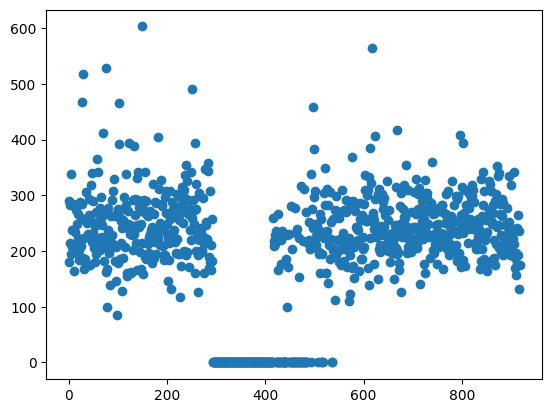

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.index,data['Cholesterol'])

In [ ]:
data=data.drop(data['Cholesterol'][data['Cholesterol']==0].index)
data=data.drop(data['Cholesterol'][data['Cholesterol']>=400].index)
data.reset_index(drop=True, inplace=True)

In [ ]:
def apply_Cholesterol(Cholesterol):#小于110，返回0，大于230，返回2，中间为1
    if Cholesterol<110:
        return 0
    elif Cholesterol>230:
        return 2
    else:return 1
    
data['Cholesterol']=data['Cholesterol'].apply(apply_Cholesterol)


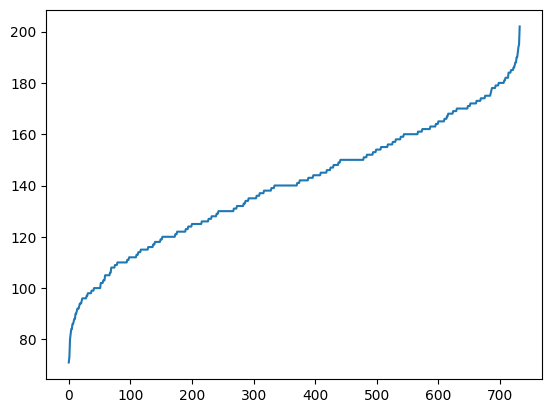

In [ ]:
plt.plot(data.index,data['MaxHR'][data['MaxHR'].sort_values().index])

In [ ]:
data=data.drop(data['Oldpeak'][data['Oldpeak']>4].index)

def apply_Oldpeak(Oldpeak):
    if Oldpeak<=1:
        return 0
    elif Oldpeak>1 and Oldpeak<=2:
        return 2
    elif Oldpeak>2 and Oldpeak<=3:
        return 3
    else: return 4

data['Oldpeak']=data['Oldpeak'].apply(apply_Oldpeak)


In [ ]:
#划分年龄，成熟期40及以下为0，40到65之间为1，大于65为2
def apply_Age(Age):
    if Age<=40:
        return 0
    elif Age>40 and Age<=65:
        return 1
    else:return 2
data['Age']=data['Age'].apply(apply_Age)


In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
target=data['HeartDisease']
data=data.drop('HeartDisease',1)

C:\Users\21550\AppData\Local\Temp\ipykernel_11552\1724590934.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('HeartDisease',1)


In [ ]:
target=np.array(target)
data=np.array(data)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(data,target,test_size=0.3)

In [ ]:
clf = tree.DecisionTreeClassifier()# 载入决策树分类模型
clf = clf.fit(Xtrain, Ytrain)# 决策树拟合，得到模型
score = clf.score(Xtest, Ytest) #返回预测的准确度
print(score)

0.7899543378995434


In [ ]:
feature_name = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
#特征重要性
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('Age', 0.01386549379250109),
 ('Sex', 0.07848788557496697),
 ('ChestPainType', 0.10948943391523705),
 ('RestingBP', 0.029427869042716083),
 ('Cholesterol', 0.054238919141595544),
 ('FastingBS', 0.020399718973531655),
 ('RestingECG', 0.035488024424277086),
 ('MaxHR', 0.20915875772832043),
 ('ExerciseAngina', 0.08965195870702765),
 ('Oldpeak', 0.028277871428846697),
 ('ST_Slope', 0.3315140672709797)]

In [ ]:
dot_data = tree.export_graphviz(clf,
                                feature_names= feature_name,
                                class_names=['yes','no'],
                                filled=True,rounded=True)
graph = graphviz.Source(dot_data)#画树
graph.render('D:\software_bag_X\MicrosoftVScodefiles\Tree.pdf') 

'D:\\software_bag_X\\MicrosoftVScodefiles\\Tree.pdf.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf,
                                feature_names= feature_name,
                                class_names=['yes','no'],
                                filled=True,rounded=True)
graph = graphviz.Source(dot_data)#画树
graph.render('D:\software_bag_X\MicrosoftVScodefiles\Tree.pdf') 